# Titanic - Machine Learning from Disaster

##### The objective of this competition is to use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.

### 0) Import of packages

In [14]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('data/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

#!pip install -U seaborn

data/test.csv
data/train.csv


### Main variables 

<div>
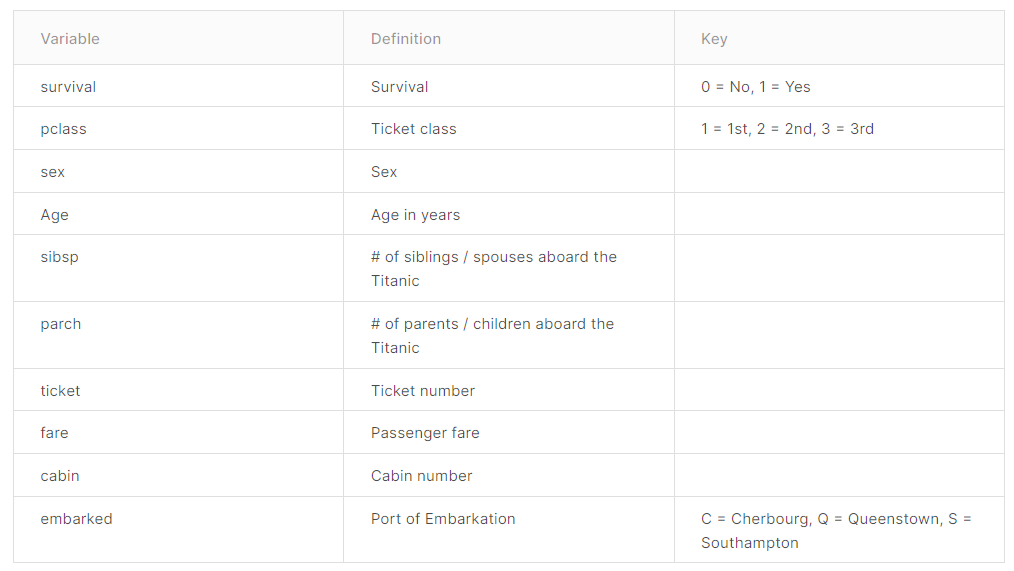
</div>

## Variable notes

**Pclass**: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

**Age**: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

**Sibsp**: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

**Parch**: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

### 1) Load the data

In [2]:
pwd

'C:\\Users\\incar\\Documents\\GitHub\\Kaggle_Titanic_Competition'

### 2) Data structure

In [3]:
train_data = pd.read_csv("data/train.csv", index_col='PassengerId')
test_data = pd.read_csv("data/test.csv", index_col='PassengerId')

train_data.head()

# Test data does not contain the target variable (Survived)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_data.shape

(891, 11)

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


### 3) Initial exploratory analysis

In [6]:
train_data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

Age, Cabin and Embarked show missing values

In [8]:
train_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Read data and split in training and test set

In [105]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Read the data
X_full = pd.read_csv('data/train.csv', index_col='PassengerId')
X_test_full = pd.read_csv('data/test.csv', index_col='PassengerId')

In [106]:
X_full

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [107]:
# # Remove rows with missing target, separate target from predictors
# X_full.dropna(axis=0, subset=['Survived'], inplace=True)
# y = X_full.Survived
# X_full.drop(['Survived'], axis=1, inplace=True)

# # Break off validation set from training data
# X_train_full, X_valid_full, y_train, y_valid = train_test_split(X_full, y, 
#                                                                 train_size=0.8, test_size=0.2,
#                                                                 random_state=0)

# # "Cardinality" means the number of unique values in a column
# # Select categorical columns with relatively low cardinality (convenient but arbitrary)
# categorical_cols = [cname for cname in X_train_full.columns if
#                     X_train_full[cname].nunique() < 10 and 
#                     X_train_full[cname].dtype == "object"]

# # Select numerical columns
# numerical_cols = [cname for cname in X_train_full.columns if 
#                 X_train_full[cname].dtype in ['int64', 'float64']]

# # Keep selected columns only
# my_cols = categorical_cols + numerical_cols
# X_train = X_train_full[my_cols].copy()
# X_valid = X_valid_full[my_cols].copy()
# X_test = X_test_full[my_cols].copy()

In [108]:
# categorical_cols

In [109]:
# numerical_cols

In [110]:
# #There are many missing observations for the column "Cabin". It can be dropped
# train_data.drop(["Cabin"], axis=1, inplace=True)

#### Age is missing more frequently among not survived passengers

In [111]:
train_data[train_data.Age.isnull()].Survived.value_counts()

0    125
1     52
Name: Survived, dtype: int64

In [9]:
train_data[train_data.Age.isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...
860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S


#### Younger passengers are more likely to survive

Mean age


Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64

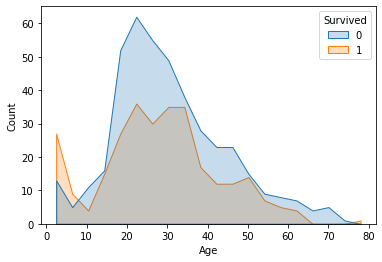

In [15]:
sns.histplot(train_data, x="Age", hue="Survived", element="poly")
print("Mean age")
train_data.groupby('Survived').Age.mean()

In particular, kids younger than 5 are very likely to survive

#### Female passengers are more likely to survive

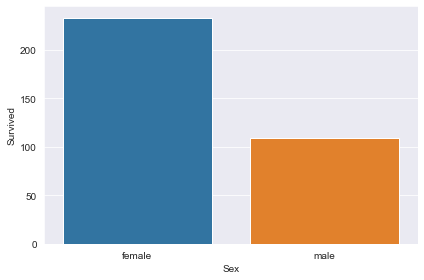

In [16]:
aggr_data = train_data[["Survived", "Sex"]].groupby(by=["Sex"], as_index=False).sum() ## Survived = 1

sns.set_style('darkgrid')
sns.barplot(x=aggr_data["Sex"], y=aggr_data["Survived"])

plt.tight_layout()
plt.show()


In [17]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of people who survived:", "%.2f" % (sum(train_data["Survived"])/len(train_data["Survived"])*100), "%")
print("% of women who survived:", "%.2f" % (rate_women*100), "%")
print("% of men who survived:", "%.2f" % (rate_men*100), "%")

% of people who survived: 38.38 %
% of women who survived: 74.20 %
% of men who survived: 18.89 %


#### Female passengers are on average younger than men

Mean age


Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

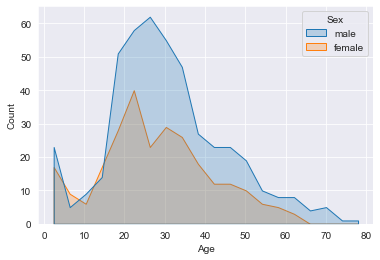

In [18]:
sns.histplot(train_data, x="Age", hue="Sex", element="poly")

print("Mean age")
train_data.groupby('Sex').Age.mean()


#### 3rd class passengers are on average younger

Mean age


Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

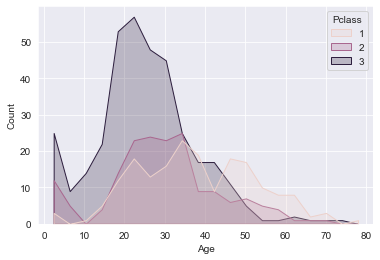

In [141]:
sns.histplot(train_data, x="Age", hue="Pclass", element="poly")

print("Mean age")
train_data.groupby('Pclass').Age.mean()


#### However, 3rd class passengers are less likely to survive. In particular females from the 1st and 2nd class, have a very high change of surviving. Males from the 1st class are a bit less likely to survive than females from the third class

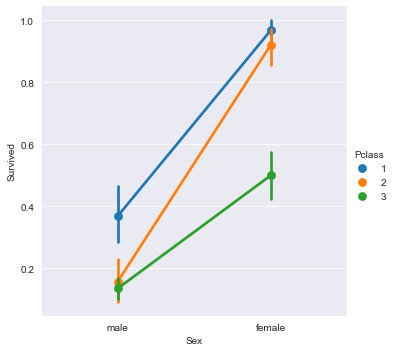

In [19]:
sns.catplot(x="Sex", y="Survived", hue="Pclass", kind="point", data=train_data)

### Passengers with 1 Spouse and children had higher chances to survive

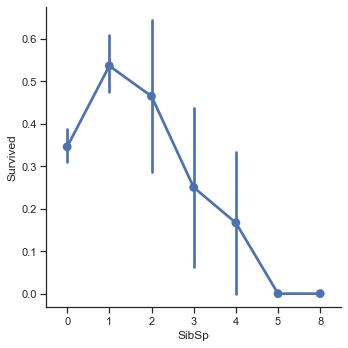

In [30]:
sns.catplot(x="SibSp", y="Survived", kind="point", data=train_data)

#### Plot pairwise correlations

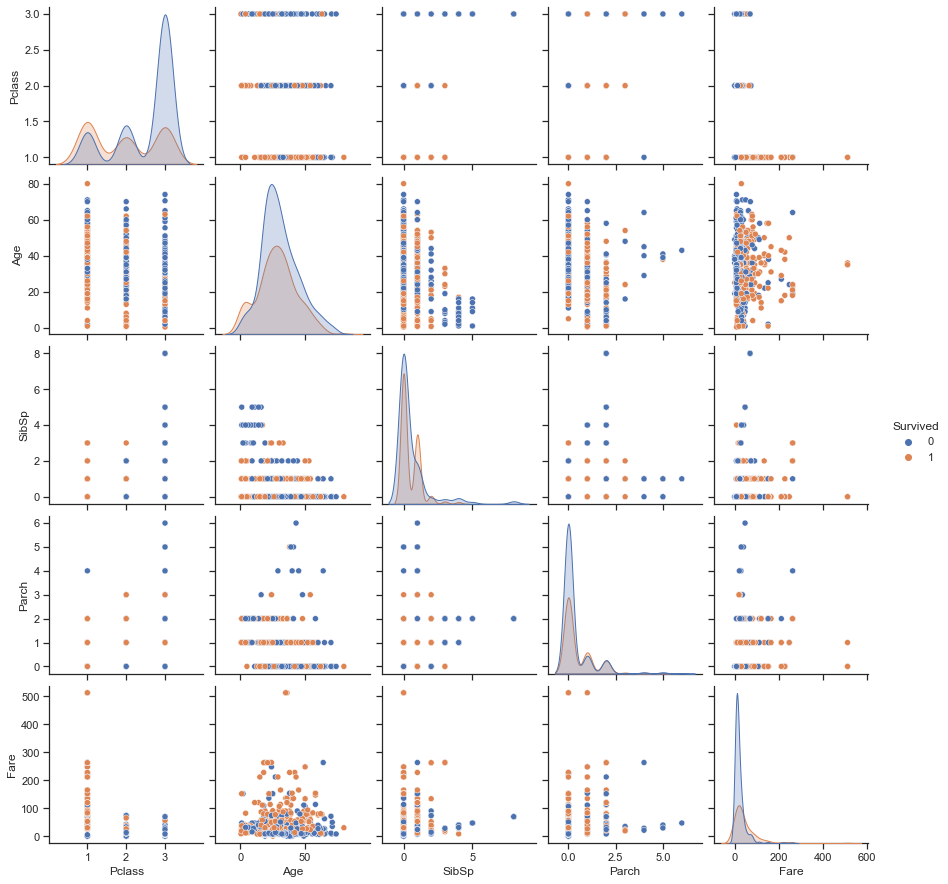

In [20]:
import seaborn as sns
sns.set_theme(style="ticks")

sns.pairplot(train_data, hue="Survived")

### ???) Feature engineeriing

In [61]:
train_data["Family_size"] = train_data["Parch"] + train_data["SibSp"]

In [64]:

train_data.groupby(["Sex", 'Pclass']).Age.describe()

count       mean        std   min     25%   50%    75%   max
Sex    Pclass                                                              
female 1        85.0  34.611765  13.612052  2.00  23.000  35.0  44.00  63.0
       2        74.0  28.722973  12.872702  2.00  22.250  28.0  36.00  57.0
       3       102.0  21.750000  12.729964  0.75  14.125  21.5  29.75  63.0
male   1       101.0  41.281386  15.139570  0.92  30.000  40.0  51.00  80.0
       2        99.0  30.740707  14.793894  0.67  23.000  30.0  36.75  70.0
       3       253.0  26.507589  12.159514  0.42  20.000  25.0  33.00  74.0

Female and 3rd class people are on average younger. We can use these averages to fill the missing age values

In [65]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,0


In [ ]:
train_data.set_index('Age').isna().sum(level=0)

In [84]:
train_data.groupby(["Sex", 'Pclass', 'SibSp']).Age.describe()

count       mean        std        min        25%  \
Sex    Pclass SibSp                                                      
female 1      0       49.0  34.037455  12.603781  15.000000  24.000000   
              1       40.0  36.166765  13.184539   2.000000  32.500000   
              2        3.0  30.666667  19.399313  18.000000  19.500000   
              3        2.0  23.500000   0.707107  23.000000  23.250000   
       2      0       44.0  30.362408  12.180553   6.000000  23.750000   
              1       28.0  27.321429  13.452395   2.000000  22.000000   
              2        3.0  17.333333  11.547005   4.000000  14.000000   
              3        1.0  30.000000        NaN  30.000000  30.000000   
       3      0       81.0  22.521605   9.587606   1.000000  19.000000   
              1       38.0  25.789474  11.068815   1.000000  21.187500   
              2        7.0  10.892857   9.261094   0.750000   2.875000   
              3        8.0  15.031250  11.075582   2.000000   6.750000   
              4        6.0   8.333333   5.278889   2.000000   5.250000   
              5        1.0  16.000000        NaN  16.000000  16.000000   
              8        3.0  21.750000   0.000000  21.750000  21.750000   
male   1      0       88.0  42.391013  13.133987   4.000000  35.000000   
              1       31.0  38.481290  15.255322   0.920000  28.500000   
              2        2.0  47.000000   4.242641  44.000000  45.500000   
              3        1.0  19.000000        NaN  19.000000  19.000000   
       2      0       76.0  32.618373  13.243378   0.830000  24.750000   
              1       27.0  27.407407  15.980645   0.670000  20.000000   
              2        5.0  20.200000  11.519549   1.000000  21.000000   
       3      0      270.0  28.298164   9.480788   0.420000  22.250000   
              1       45.0  23.823909   9.073544   1.000000  18.000000   
              2        8.0  28.126897   7.730512  16.000000  25.500000   
              3        4.0  10.626897  11.119480   2.000000   3.500000   
              4       12.0   6.416667   4.776045   1.000000   2.750000   
              5        4.0   8.750000   5.560276   1.000000   7.000000   
              8        4.0  26.507589   0.000000  26.507589  26.507589   

                           50%        75%        max  
Sex    Pclass SibSp                                   
female 1      0      33.000000  42.000000  62.000000  
              1      35.000000  45.500000  63.000000  
              2      21.000000  37.000000  53.000000  
              3      23.500000  23.750000  24.000000  
       2      0      29.500000  36.500000  57.000000  
              1      27.500000  34.500000  54.000000  
              2      24.000000  24.000000  24.000000  
              3      30.000000  30.000000  30.000000  
       3      0      21.750000  25.000000  63.000000  
              1      21.750000  31.750000  48.000000  
              2       9.000000  19.500000  21.750000  
              3      15.375000  21.750000  33.000000  
              4       7.500000  10.500000  17.000000  
              5      16.000000  16.000000  16.000000  
              8      21.750000  21.750000  21.750000  
male   1      0      41.281386  48.750000  80.000000  
              1      38.000000  49.000000  70.000000  
              2      47.000000  48.500000  50.000000  
              3      19.000000  19.000000  19.000000  
       2      0      30.740707  37.125000  70.000000  
              1      31.000000  35.000000  60.000000  
              2      23.000000  24.000000  32.000000  
       3      0      26.507589  31.000000  74.000000  
              1      26.000000  27.000000  40.000000  
              2      26.507589  30.250000  41.000000  
              3       7.000000  14.126897  26.507589  
              4       5.500000   8.250000  16.000000  
              5      10.000000  11.750000  14.000000  
              8      26.507589  26.507589  26.507589

In [76]:
train_data["Age"] =  train_data.groupby(["Sex", 'Pclass']).Age.transform(lambda x: x.fillna(x.mean()))

In [77]:
train_data[train_data["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_size


In [69]:
train_data["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [71]:
train_data[train_data["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_size
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN,0
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN,0


In [72]:
train_data[(train_data["Fare"]<=85) &(train_data["Fare"]>75) ].Embarked.value_counts()

C    16
S    13
Name: Embarked, dtype: int64

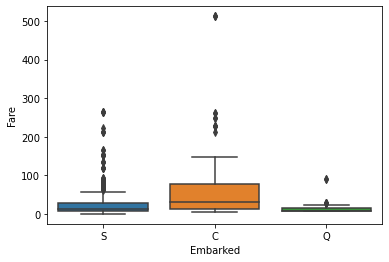

In [73]:
ax = sns.boxplot(x="Embarked", y="Fare", data=train_data)

In [74]:
train_data.groupby(["Embarked", 'Pclass']).Fare.describe()

count        mean        std      min      25%      50%  \
Embarked Pclass                                                            
C        1        85.0  104.718529  99.093935  26.5500  49.5000  78.2667   
         2        17.0   25.358335  11.345067  12.0000  13.8625  24.0000   
         3        66.0   11.214083   4.871528   4.0125   7.2292   7.8958   
Q        1         2.0   90.000000   0.000000  90.0000  90.0000  90.0000   
         2         3.0   12.350000   0.000000  12.3500  12.3500  12.3500   
         3        72.0   11.183393   6.721677   6.7500   7.7500   7.7500   
S        1       127.0   70.364862  58.811278   0.0000  29.2500  52.0000   
         2       164.0   20.327439  13.630741   0.0000  13.0000  13.5000   
         3       353.0   14.644083  13.276609   0.0000   7.8542   8.0500   

                        75%       max  
Embarked Pclass                        
C        1       110.883300  512.3292  
         2        37.004200   41.5792  
         3        14.458300   22.3583  
Q        1        90.000000   90.0000  
         2        12.350000   12.3500  
         3        10.218725   29.1250  
S        1        83.475000  263.0000  
         2        26.000000   73.5000  
         3        16.100000   69.5500

In [75]:
train_data.Embarked = train_data.Embarked.transform(lambda x: x.fillna("C"))

In [78]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Family_size    0
dtype: int64

In [40]:
data = [train_data, test_data]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

### 4) Split data in train and test set

In [42]:
from sklearn.model_selection import train_test_split

# Separate target from predictors
y = train_data.Survived
X = train_data.drop(['Survived'], axis=1)


# Divide data into training and validation subsets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,random_state=0)

# Exploratory Analysis

In [43]:
from sklearn.preprocessing import OneHotEncoder

cat_cols = ["Sex", "Embarked", "Pclass"]

# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

oh_enconder_train = OH_encoder.fit_transform(X_train[cat_cols])
oh_enconder_valid = OH_encoder.fit_transform(X_valid[cat_cols])
column_names = OH_encoder.get_feature_names(cat_cols)

OH_cols_train = pd.DataFrame(oh_enconder_train, columns=column_names)
OH_cols_valid = pd.DataFrame(oh_enconder_valid, columns=column_names)


# One-hot encoding removed index; put it back
OH_cols_train.index = X_train.index
OH_cols_valid.index = X_valid.index

# Remove categorical columns (will replace with one-hot encoding)
num_X_train = X_train.drop(cat_cols, axis=1)
num_X_valid = X_valid.drop(cat_cols, axis=1)

# Add one-hot encoded columns to numerical features
OH_X_train = pd.concat([num_X_train, OH_cols_train], axis=1)
OH_X_valid = pd.concat([num_X_valid, OH_cols_valid], axis=1)

In [44]:
OH_X_train.head()

,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Family_size,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
140,141,"Boulos, Mrs. Joseph (Sultana)",141.0,0,2,2678,15,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
439,440,"Kvillner, Mr. Johan Henrik Johannesson",440.0,0,0,C.A. 18723,10,0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
817,818,"Mallet, Mr. Albert",818.0,1,1,S.C./PARIS 2079,37,2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
378,379,"Betros, Mr. Tannous",379.0,0,0,2648,4,0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
491,492,"Windelov, Mr. Einar",492.0,0,0,SOTON/OQ 3101317,7,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


# Model the data

In [49]:
OH_X_train.columns

Index(['PassengerId', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Family_size', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Pclass_1', 'Pclass_2', 'Pclass_3'],
      dtype='object')

In [50]:
from sklearn.ensemble import RandomForestClassifier

y = y_train

features = ['Sex_female', "Fare", 'Family_size', "Age"]

X = OH_X_train[features]
X_test =  OH_X_valid[features]

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': X_valid.PassengerId, 'Survived': predictions})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
